In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

---

# LOADING FROM TENSORBOARD
avoid running this if there is no access to logs

---

### n2n_a

In [3]:
n2n_a_1 = EventAccumulator('../experiments/28_Turn_n2n/logs/PPO2_1')
n2n_a_1.Reload()

n2n_a_2 = EventAccumulator('../experiments/29_Turn_n2n_cont/logs/PPO2_1')
n2n_a_2.Reload()

n2n_a_3 = EventAccumulator('../experiments/29_Turn_n2n_cont2/logs/PPO2_1')
n2n_a_3.Reload()

n2n_a_4 = EventAccumulator('../experiments/30_Turn_n2n_cont3/logs/PPO2_1')
n2n_a_4.Reload()

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


In [4]:
a_w_times_1, a_step_nums_1, a_vals_1 = zip(*n2n_a_1.Scalars('episode/episode_reward'))
a_w_times_2, a_step_nums_2, a_vals_2 = zip(*n2n_a_2.Scalars('episode/episode_reward'))
a_w_times_3, a_step_nums_3, a_vals_3 = zip(*n2n_a_3.Scalars('episode/episode_reward'))
a_w_times_4, a_step_nums_4, a_vals_4 = zip(*n2n_a_4.Scalars('episode/episode_reward'))

a_step_nums_2 = tuple([step + max(a_step_nums_1) for step in a_step_nums_2])
a_step_nums_3 = tuple([step + max(a_step_nums_2) for step in a_step_nums_3])
a_step_nums_4 = tuple([step + max(a_step_nums_3) for step in a_step_nums_4])

w_times_a   = a_w_times_1 + a_w_times_2 + a_w_times_3 + a_w_times_4
step_nums_a = a_step_nums_1 + a_step_nums_2 + a_step_nums_3 + a_step_nums_4
vals_a      = a_vals_1 + a_vals_2 + a_vals_3 + a_vals_4

vals_a_smooth = smooth(vals_a,0.99)

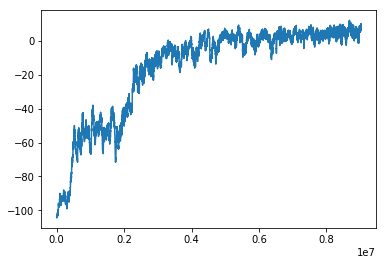

In [5]:
plt.plot(step_nums_a,vals_a_smooth)

In [ ]:
a_w_times_1, a_step_nums_1, a_vals_1 = zip(*n2n_a_1.Scalars('input_info/discounted_rewards'))
a_w_times_2, a_step_nums_2, a_vals_2 = zip(*n2n_a_2.Scalars('input_info/discounted_rewards'))
a_w_times_3, a_step_nums_3, a_vals_3 = zip(*n2n_a_3.Scalars('input_info/discounted_rewards'))
a_w_times_4, a_step_nums_4, a_vals_4 = zip(*n2n_a_4.Scalars('input_info/discounted_rewards'))

a_step_nums_2 = tuple([step + max(a_step_nums_1) for step in a_step_nums_2])
a_step_nums_3 = tuple([step + max(a_step_nums_2) for step in a_step_nums_3])
a_step_nums_4 = tuple([step + max(a_step_nums_3) for step in a_step_nums_4])

w_times_a_discounted   = a_w_times_1 + a_w_times_2 + a_w_times_3 + a_w_times_4
step_nums_a_discounted = a_step_nums_1 + a_step_nums_2 + a_step_nums_3 + a_step_nums_4
vals_a_discounted      = a_vals_1 + a_vals_2 + a_vals_3 + a_vals_4

vals_a_smooth_discounted = smooth(vals_a_discounted,0.99)
plt.plot(step_nums_a_discounted[400:],vals_a_smooth_discounted[400:])

--- 

### n2n_b

In [6]:
n2n_b_1 = EventAccumulator('../experiments/65_n2n_b/logs/PPO2_1')
n2n_b_1.Reload()

n2n_b_2 = EventAccumulator('../experiments/66_n2n_b_cont/logs/PPO2_1')
n2n_b_2.Reload()

n2n_b_3 = EventAccumulator('../experiments/67_n2n_b_cont2/logs/PPO2_1')
n2n_b_3.Reload()

# E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
#w_times, step_nums, vals = zip(*event_acc.Scalars('Accuracy'))

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


In [ ]:
b_w_times_1, b_step_nums_1, b_vals_1 = zip(*n2n_b_1.Scalars('input_info/discounted_rewards'))
b_w_times_2, b_step_nums_2, b_vals_2 = zip(*n2n_b_2.Scalars('input_info/discounted_rewards'))
b_w_times_3, b_step_nums_3, b_vals_3 = zip(*n2n_b_3.Scalars('input_info/discounted_rewards'))

b_step_nums_2 = tuple([step + max(b_step_nums_1) for step in b_step_nums_2])
b_step_nums_3 = tuple([step + max(b_step_nums_2) for step in b_step_nums_3])
w_times_b_discounted = b_w_times_1 + b_w_times_2 + b_w_times_3
step_nums_b_discounted = b_step_nums_1 + b_step_nums_2 + b_step_nums_3
vals_b_discounted = b_vals_1 + b_vals_2 + b_vals_3

vals_b_smooth_discounted = smooth(vals_b_discounted,0.99)
plt.plot(step_nums_b_discounted[400:],vals_b_smooth_discounted[400:])

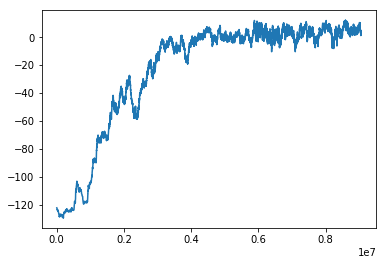

In [7]:
b_w_times_1, b_step_nums_1, b_vals_1 = zip(*n2n_b_1.Scalars('episode/episode_reward'))
b_w_times_2, b_step_nums_2, b_vals_2 = zip(*n2n_b_2.Scalars('episode/episode_reward'))
b_w_times_3, b_step_nums_3, b_vals_3 = zip(*n2n_b_3.Scalars('episode/episode_reward'))

b_step_nums_2 = tuple([step + max(b_step_nums_1) for step in b_step_nums_2])
b_step_nums_3 = tuple([step + max(b_step_nums_2) for step in b_step_nums_3])
w_times_b = b_w_times_1 + b_w_times_2 + b_w_times_3
step_nums_b = b_step_nums_1 + b_step_nums_2 + b_step_nums_3
vals_b = b_vals_1 + b_vals_2 + b_vals_3

vals_b_smooth = smooth(vals_b,0.99)
plt.plot(step_nums_b,vals_b_smooth)

---

### n2n c

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


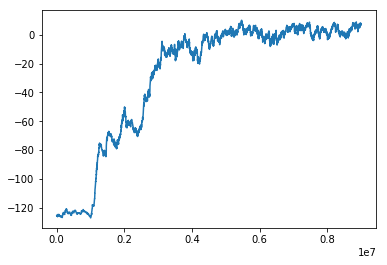

In [8]:
n2n_c = EventAccumulator('../experiments/68_n2n_c/logs/PPO2_1')
n2n_c.Reload()

w_times_c, step_nums_c, vals_c = zip(*n2n_c.Scalars('episode/episode_reward'))

vals_c_smooth = smooth(vals_c,0.99)
plt.plot(step_nums_c, vals_c_smooth)

In [ ]:
w_times_c_discounted, step_nums_c_discounted, vals_c_discounted = zip(*n2n_c.Scalars('input_info/discounted_rewards'))

vals_c_smooth_discounted = smooth(vals_c_discounted,0.99)
plt.plot(step_nums_c_discounted, vals_c_smooth_discounted)


---

### n2n d

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


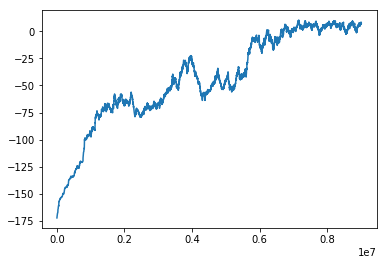

In [9]:
n2n_d = EventAccumulator('../experiments/69_n2n_d/logs/PPO2_1')
n2n_d.Reload()

w_times_d, step_nums_d, vals_d = zip(*n2n_d.Scalars('episode/episode_reward'))

vals_d_smooth = smooth(vals_d,0.99)
plt.plot(step_nums_d, vals_d_smooth)

In [ ]:
w_times_d_discounted, step_nums_d_discounted, vals_d_discounted = zip(*n2n_d.Scalars('input_info/discounted_rewards'))

vals_d_smooth_discounted = smooth(vals_d_discounted,0.99)
plt.plot(step_nums_d_discounted, vals_d_smooth_discounted)


---

### n2n e

In [10]:
n2n_e_1 = EventAccumulator('../experiments/70_n2n_e/logs/PPO2_1')
n2n_e_1.Reload()

n2n_e_2 = EventAccumulator('../experiments/74_n2n_e_cont/logs/PPO2_1')
n2n_e_2.Reload()

# E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
#w_times, step_nums, vals = zip(*event_acc.Scalars('Accuracy'))

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


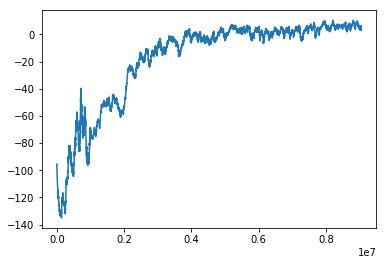

In [11]:
e_w_times_1, e_step_nums_1, e_vals_1 = zip(*n2n_e_1.Scalars('episode/episode_reward'))
e_w_times_2, e_step_nums_2, e_vals_2 = zip(*n2n_e_2.Scalars('episode/episode_reward'))

e_step_nums_2 = tuple([step + max(e_step_nums_1) for step in e_step_nums_2])

w_times_e = e_w_times_1 + e_w_times_2
step_nums_e = e_step_nums_1 + e_step_nums_2
vals_e = e_vals_1 + e_vals_2

vals_e_smooth = smooth(vals_e,0.99)
plt.plot(step_nums_e,vals_e_smooth)

In [ ]:
e_w_times_1, e_step_nums_1, e_vals_1 = zip(*n2n_e_1.Scalars('input_info/discounted_rewards'))
e_w_times_2, e_step_nums_2, e_vals_2 = zip(*n2n_e_2.Scalars('input_info/discounted_rewards'))

e_step_nums_2 = tuple([step + max(e_step_nums_1) for step in e_step_nums_2])

w_times_e_discounted = e_w_times_1 + e_w_times_2
step_nums_e_discounted = e_step_nums_1 + e_step_nums_2
vals_e_discounted = e_vals_1 + e_vals_2

vals_e_smooth_discounted = smooth(vals_e_discounted,0.99)
plt.plot(step_nums_e_discounted,vals_e_smooth_discounted)

---

### h a

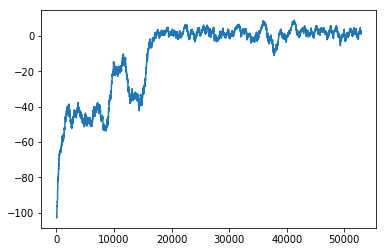

In [12]:
h_a = EventAccumulator('../experiments/17_Turn/logs/PPO2_1')
h_a.Reload()

w_times_h_a, step_nums_h_a, vals_h_a = zip(*h_a.Scalars('episode/episode_reward'))

vals_h_a_smooth = smooth(vals_h_a, 0.99)
plt.plot(step_nums_h_a,vals_h_a_smooth)

In [ ]:
w_times_h_a_discounted, step_nums_h_a_discounted, vals_h_a_discounted = zip(*h_a.Scalars('input_info/discounted_rewards'))

vals_h_a_smooth_discounted = smooth(vals_h_a_discounted, 0.99)
plt.plot(step_nums_h_a_discounted,vals_h_a_smooth_discounted)


---

## h b

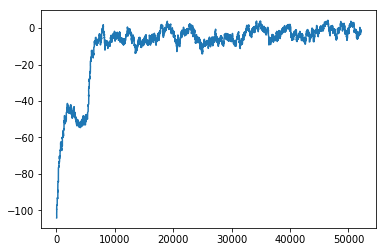

In [13]:
h_b = EventAccumulator('../experiments/22_Turn/logs/PPO2_1')
h_b.Reload()

w_times_h_b, step_nums_h_b, vals_h_b = zip(*h_b.Scalars('episode/episode_reward'))

vals_h_b_smooth = smooth(vals_h_b, 0.99)
plt.plot(step_nums_h_b, vals_h_b_smooth)

In [ ]:
w_times_h_b_discounted, step_nums_h_b_discounted, vals_h_b_discounted = zip(*h_b.Scalars('input_info/discounted_rewards'))

vals_h_b_smooth_discounted = smooth(vals_h_b_discounted, 0.99)
plt.plot(step_nums_h_b_discounted, vals_h_b_smooth_discounted)

---

## h c (not working)

In [14]:
n2n_c = EventAccumulator('/Volumes/HDD 1/experiments/77_Turn_d/logs/PPO2_1')
n2n_c.Reload()

DirectoryDeletedError: Directory /Volumes/HDD 1/experiments/77_Turn_d/logs/PPO2_1 has been permanently deleted

In [ ]:
c_w_times, c_step_nums, c_vals = zip(*n2n_c.Scalars('episode/episode_reward'))

vals_c_smooth = smooth(c_vals,0.99)

In [ ]:
plt.plot(c_step_nums,vals_c_smooth)

--- 


### Saving files


In [16]:
n2n_a = [w_times_a, step_nums_a, vals_a]
n2n_b = [w_times_b, step_nums_b, vals_b]
n2n_c = [w_times_c, step_nums_c, vals_c]
n2n_d = [w_times_d, step_nums_d, vals_d]
n2n_e = [w_times_e, step_nums_e, vals_e]
h_a = [w_times_h_a, step_nums_h_a, vals_h_a]
h_b = [w_times_h_b, step_nums_h_b, vals_h_b]

pickle.dump(n2n_a,open('./Turn_n2n_vs_h/n2n_a.pkl','wb'))
pickle.dump(n2n_b,open('./Turn_n2n_vs_h/n2n_b.pkl','wb'))
pickle.dump(n2n_c,open('./Turn_n2n_vs_h/n2n_c.pkl','wb'))
pickle.dump(n2n_d,open('./Turn_n2n_vs_h/n2n_d.pkl','wb'))
pickle.dump(n2n_e,open('./Turn_n2n_vs_h/n2n_e.pkl','wb'))
pickle.dump(h_a,open('./Turn_n2n_vs_h/h_a.pkl','wb'))
pickle.dump(h_b,open('./Turn_n2n_vs_h/h_b.pkl','wb'))

--- 

# ALL TOGETHER

In [ ]:
w_times_a, step_nums_a, vals_a = pickle.load(open('./Turn_n2n_vs_h/n2n_a.pkl','rb'))
w_times_b, step_nums_b, vals_b = pickle.load(open('./Turn_n2n_vs_h/n2n_b.pkl','rb'))
w_times_c, step_nums_c, vals_c = pickle.load(open('./Turn_n2n_vs_h/n2n_c.pkl','rb'))
w_times_d, step_nums_d, vals_d = pickle.load(open('./Turn_n2n_vs_h/n2n_d.pkl','rb'))
w_times_e, step_nums_e, vals_e = pickle.load(open('./Turn_n2n_vs_h/n2n_e.pkl','rb'))
w_times_h_a, step_nums_h_a, vals_h_a = pickle.load(open('./Turn_n2n_vs_h/h_a.pkl','rb'))
w_times_h_b, step_nums_h_b, vals_h_b = pickle.load(open('./Turn_n2n_vs_h/h_b.pkl','rb'))

vals_a_smooth = smooth(vals_a, 0.99)
vals_b_smooth = smooth(vals_b, 0.99)
vals_c_smooth = smooth(vals_c, 0.99)
vals_d_smooth = smooth(vals_d, 0.99)
vals_e_smooth = smooth(vals_e, 0.99)
vals_h_a_smooth = smooth(vals_h_a, 0.99)
vals_h_b_smooth = smooth(vals_h_b, 0.99)

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(step_nums_a, vals_a_smooth,alpha=0.5)
plt.plot(step_nums_b, vals_b_smooth,alpha=0.5)
plt.plot(step_nums_c, vals_c_smooth,alpha=0.5)
plt.plot(step_nums_d, vals_d_smooth,alpha=0.5)
plt.plot(step_nums_e, vals_e_smooth,alpha=0.5)

In [ ]:
plt.figure(figsize=(15,9))

plt.plot(step_nums_h_a, vals_h_a_smooth,alpha=0.5)
plt.plot(step_nums_h_b, vals_h_b_smooth,alpha=0.5)

---

## Max

In [ ]:
print("max val under all n2n is ", max(vals_a+vals_b+vals_c+vals_d))
print("max val under all h   is ", max(vals_h_a+vals_h_b))

---

In [ ]:
plt.plot(step_nums_h_a[-2000:],vals_h_a_smooth[-2000:])
plt.plot(step_nums_h_b[-2000:],vals_h_b_smooth[-2000:])

In [ ]:
plt.plot(step_nums_a[-2000:], vals_a_smooth[-2000:],alpha=0.5)
plt.plot(step_nums_b[-2000:], vals_b_smooth[-2000:],alpha=0.5)
plt.plot(step_nums_c[-2000:], vals_c_smooth[-2000:],alpha=0.5)
plt.plot(step_nums_d[-2000:], vals_d_smooth[-2000:],alpha=0.5)

---

## Std

In [ ]:
print("avg val under all n2n is %0.2f and the var is %0.2f" % (
    np.mean(vals_a[-2000:]+vals_b[-2000:]+vals_c[-2000:]+vals_d[-2000:]),
    np.std(vals_a[-2000:]+vals_b[-2000:]+vals_c[-2000:]+vals_d[-2000:])))
print("avg val under all h   is %0.2f and the var is %0.2f" % (
    np.mean(vals_h_a[-2000:]+vals_h_b[-2000:]),
    np.std(vals_h_a[-2000:]+vals_h_b[-2000:])))

---

In [ ]:
plt.figure(figsize=(15,9))

plt.plot(step_nums_h_a, vals_h_a_smooth,alpha=0.5)
plt.plot(step_nums_h_b, vals_h_b_smooth,alpha=0.5)
plt.plot(x[:,1],smooth(x[:,2],0.99))

In [ ]:
x = np.genfromtxt('/hdd/Downloads/run-logs_PPO2_1-tag-episode_episode_reward.csv', delimiter=',')